In [7]:
import os
os.system('clear')
import cv2
import time
import numpy as np
import imutils
from datetime import datetime
from SecretColors.palette import Palette
material = Palette("material",color_mode="rgb255")
from termcolor import colored
import matplotlib.pyplot as plt
from tkinter import Tk
from scipy.spatial.distance import pdist, squareform
import seaborn
import pandas as pd


...

Year: 2013

Buy volume: 467398 MWh
Sell volume: 402690 MWh



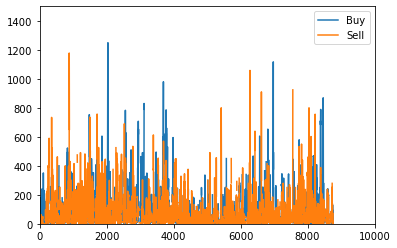


...

Year: 2014

Buy volume: 700981 MWh
Sell volume: 612847 MWh



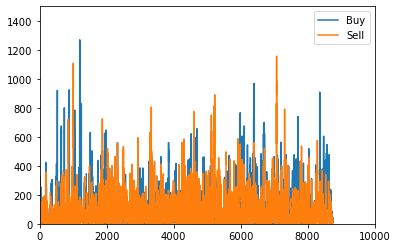


...

Period: 2013–2014
Buy volume: 1168379 MWh
Sell volume: 1015537 MWh

...



In [8]:
# os.chdir("./Elbas volumes")
years = ['2013','2014']#,'2015','2016','2017','2018','2019','2020']
country = 'NL'
dfo = pd.DataFrame()

buy = []
sell = []

for y in years:
    i = years.index(y)
    df = pd.read_html(f"./elbas-volumes_{y}_hourly.xls", header=[2,3], decimal=',', thousands='.')
    df = df[0]
    df = df[(country)]
    df = df.apply(pd.to_numeric, args=('coerce',))
    
    buy.append(df['Buy'].sum())
    sell.append(df['Sell'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Buy volume: {int(round(buy[i]))} MWh', 'blue'))
    print(colored(f'Sell volume: {int(round(sell[i]))} MWh', 'blue'))
    print('')
    
    df.plot(legend=True)
    plt.xlim(0,10000)
    plt.ylim(0, 1500)
    plt.show()

    dfo = dfo.append(df, ignore_index = True)

print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print(colored(f'Buy volume: {int(round(sum(buy)))} MWh', 'blue'))
print(colored(f'Sell volume: {int(round(sum(sell)))} MWh', 'blue'))
print('')
print(colored('...','white'))
print('')

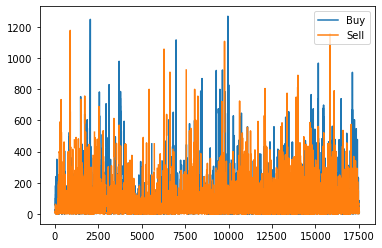

In [9]:
dfo.plot(legend=True)
plt.show()